# SETUP

## imports

In [4]:
import string
import numpy as np
from itertools import cycle
import requests
import collections
from pprint import pprint
import operator
import concurrent
from time import sleep
from MarbleGameList import MarbleGameLinkedList
import re
from functools import reduce
from dataclasses import dataclass
from copy import deepcopy

## constants

In [5]:
lowercase = string.ascii_lowercase
uppercase = string.ascii_uppercase

## helpers

In [6]:
def get_level_input(lvl_num):
    with open(f"advent_inputs/{lvl_num}.txt") as f:
        level_input=f.read()
        return level_input[:-1]
    
def print_result(answer):
    pprint("RESULT: "+str(answer))
    print()
    pprint("TIME"+"."*60)
    
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# LEVEL 1

## setup

In [4]:
frequencies=get_level_input("01")
frequencies=frequencies.splitlines()
frequencies=[int(x[1:]) if x[0]=='+' else int(x) for x in frequencies]

## part one

In [5]:
%%time
print_result(sum(frequencies))

'RESULT: 500'

'TIME............................................................'
CPU times: user 542 µs, sys: 367 µs, total: 909 µs
Wall time: 600 µs


## part two

In [6]:
%%time
y=set({})
current_sum = 0
for i in cycle(frequencies):
    current_sum+=i
    if current_sum in y:
        print_result(current_sum)
        break
    else:
        y.add(current_sum)

'RESULT: 709'

'TIME............................................................'
CPU times: user 46.5 ms, sys: 5.28 ms, total: 51.8 ms
Wall time: 51.4 ms


# LEVEL 2

## setup

In [7]:
input_boxes=get_level_input("02")
input_boxes=input_boxes.split('\n')
count_boxes = [collections.Counter(a) for a in input_boxes]

## part one

In [8]:
%%time
twos=0
threes=0
for box_id in count_boxes:
    if 2 in box_id.values():
        twos+=1
    if 3 in box_id.values():
        threes+=1
print_result(str(twos*threes))

'RESULT: 6422'

'TIME............................................................'
CPU times: user 623 µs, sys: 268 µs, total: 891 µs
Wall time: 652 µs


## part two

In [9]:
%%time
for i, box_one in enumerate(input_boxes):
    for box_two in input_boxes[i+1:]:
        diff=0
        wrong_letter_index=0
        for j in range(len(box_one)):
            if box_one[j]==box_two[j]: continue
            diff+=1
            wrong_letter_index=j
            if(diff>1): break
        if(diff==1): 
            print_result(box_one[:wrong_letter_index]+box_one[wrong_letter_index+1:])
            raise StopExecution     

'RESULT: qcslyvphgkrmdawljuefotxbh'

'TIME............................................................'


# LEVEL 3

## setup

In [10]:
fabric_list=get_level_input("03").splitlines()
fabric_list=[x.split(" ") for x in fabric_list]

## part one

In [11]:
%%time
fabric=np.zeros((1000,1000))
for i in fabric_list:
    dim=tuple([int(z) for z in i[2][:-1].split(",")])
    size=tuple([int(z) for z in i[3].split("x")])
    fabric[dim[0]:dim[0]+size[0],dim[1]:dim[1]+size[1]]+=1
    NUM_SINGLE_USED=(fabric > 1).sum()
print_result(NUM_SINGLE_USED)

'RESULT: 101565'

'TIME............................................................'
CPU times: user 1.9 s, sys: 19.9 ms, total: 1.92 s
Wall time: 2.02 s


## part two

In [12]:
%%time
for i in fabric_list:
    dim=tuple([int(z) for z in i[2][:-1].split(",")])
    size=tuple([int(z) for z in i[3].split("x")])
    if((fabric[dim[0]:dim[0]+size[0],dim[1]:dim[1]+size[1]]==1).all()):
        print_result(i[0])

'RESULT: #656'

'TIME............................................................'
CPU times: user 15 ms, sys: 2.99 ms, total: 17.9 ms
Wall time: 15.8 ms


# LEVEL 4

## setup

In [13]:
guards = get_level_input("4")
guards = guards.splitlines()
guards.sort()
guards = [[x[0][-2:], x[1][1:]] for x in [j.split(']') for j in guards]]

## part one

In [14]:
%%time

cur_guard=0
guard_to_min={}
for i, log in enumerate(guards):
    if(log[1][0]=='G'):
        cur_guard=int(log[1].split(" ")[1][1:])
        if cur_guard not in guard_to_min.keys():
            guard_to_min[cur_guard]=np.zeros(60)
    elif(log[1][0]=='f'):
        if(int(log[0])<int(guards[i+1][0])):
            guard_to_min[cur_guard][int(log[0]):int(guards[i+1][0])]+=1
        else:
            guard_to_min[cur_guard][int(log[0]):]+=1
            guard_to_min[cur_guard][:int(guards[i+1][0])]+=1
m = max([sum(v) for v in guard_to_min.values()])

for key,value in guard_to_min.items():
    if( m==sum(value)):
        print_result(list(value).index(max(value))*key)

'RESULT: 102688'

'TIME............................................................'
CPU times: user 3.47 ms, sys: 234 µs, total: 3.71 ms
Wall time: 3.64 ms


## part two

In [15]:
%%time

cur_guard=0
guard_to_min={}
for i, log in enumerate(guards):
    if(log[1][0]=='G'):
        cur_guard=int(log[1].split(" ")[1][1:])
        if cur_guard not in guard_to_min.keys():
            guard_to_min[cur_guard]=np.zeros(60)
    elif(log[1][0]=='f'):
        if(int(log[0])<int(guards[i+1][0])):
            guard_to_min[cur_guard][int(log[0]):int(guards[i+1][0])]+=1
        else:
            guard_to_min[cur_guard][int(log[0]):]+=1
            guard_to_min[cur_guard][:int(guards[i+1][0])]+=1
m = max(i for v in guard_to_min.values() for i in v)

for key,value in guard_to_min.items():
    if( m in value ):
        print_result(list(value).index(m)*key)

'RESULT: 56901'

'TIME............................................................'
CPU times: user 3.34 ms, sys: 257 µs, total: 3.6 ms
Wall time: 4.3 ms


# LEVEL 5

## setup

In [49]:
polymers=get_level_input("05")

## part one

In [17]:
%%time
polymer_temp=polymers
i=0
while i!=len(polymer_temp)-1:
    if(abs(ord(polymer_temp[i])-ord(polymer_temp[i+1]))==32):
        polymer_temp=polymer_temp[0:i]+polymer_temp[i+2:]
        i=max(0,i-1)
    else:
        i+=1
print(len(polymer_temp))

9202
CPU times: user 109 ms, sys: 6.83 ms, total: 116 ms
Wall time: 117 ms


## part two

In [18]:
%%time
scores=[]
for letter in lowercase:
    polymer_temp=polymers
    i=0
    polymer_temp=polymer_temp.translate(str.maketrans('', '', letter+letter.upper()))
    while i!=len(polymer_temp)-1:
        if(abs(ord(polymer_temp[i])-ord(polymer_temp[i+1]))==32):
            polymer_temp=polymer_temp[0:i]+polymer_temp[i+2:]
            i=max(0,i-1)
        else:
            i+=1
    scores.append(len(polymer_temp))
print_result(min(scores))

'RESULT: 6394'

'TIME............................................................'
CPU times: user 2.28 s, sys: 82.9 ms, total: 2.36 s
Wall time: 2.39 s


# LEVEL 6

## setup

In [19]:
GRID_SIZE=1000
SHIFT_SIZE=50

coords=get_level_input(6)
coords_list=[tuple([int(coord.split(", ")[0]), int(coord.split(", ")[1])]) for coord in coords.splitlines()]
shift_coords_list = [(x[0]+SHIFT_SIZE, x[1]+SHIFT_SIZE) for x in coords_list]

def l1(c1, c2):
    return abs(c1[0]-c2[0])+abs(c1[1]-c2[1])

def get_index_min_l1(pos):
    coord_min=[]
    for coord in shift_coords_list:
        coord_min.append(l1(coord, pos))
    x=np.where(np.array(coord_min) == np.array(coord_min).min())
    if(len(x[0])>1): return 0
    return x[0][0]

def determine_inf_values():
    inf_set=set({})
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if 0 in {i, j} or GRID_SIZE-1 in {i,j}:
                inf_set.add(get_index_min_l1((i,j))+1)
    return inf_set

inf_set=determine_inf_values()

In [20]:
# TEST_COORDS
# GRID_SIZE=20
# SHIFT_SIZE=5
# coords_list=[(1, 1),(1, 6),(8, 3),(3, 4),(5, 5),(8, 9)]
# shift_coords_list = [(x[0]+SHIFT_SIZE, x[1]+SHIFT_SIZE) for x in shift_coords_list]
# coords= set(coord_list)

# print(coords_list)

## part one

### thoughts

- Need to determine which areas are infinite
    - are these automatically the points that have the lowest or highest x or y coordinate?
- Need to limit scope and calculate each grdp points relation to our coordinates
- Assign the minimum distance to a points area score
- Pick the point that has the minimum area score that is not infiinite

### EPIPHANY
CHANGING THE SIZE OF THE GRID WILL NOT CHANGE THE NUMBER OF RESULTS FOR NON-INFINITE OPTIONS. THIS CAN ONLY BE THE CASE FOR NON INF OPTIONS SO TRY TWO GRIDS ONE OF SMALL SIZE, ONF OF LARGER SIZE AND CHOOSE MAX VALUE THAT DOESN'T CHANGE.

**NOTE**: the grid size must expand in all directions for this method to work. This means points need to be recentered

**NOTTE**: easier solutiton, any point that owns one of thte outer rings will be infinite(given a significant enough buffer around all points


In [21]:
%%time

test_grid = np.zeros((GRID_SIZE,GRID_SIZE))
for i, coord in enumerate(shift_coords_list):
    test_grid[coord[0], coord[1]]=i+1
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if 0 not in {i, j} or GRID_SIZE-1 not in {i,j}:
            min_value=get_index_min_l1((i,j))+1
            if(min_value not in inf_set):
                test_grid[i][j]=min_value
largest_non_inf_area = int(collections.Counter(list(test_grid.flatten())).most_common(2)[1][1])
print_result(largest_non_inf_area)


'RESULT: 3223'

'TIME............................................................'
CPU times: user 38.5 s, sys: 847 ms, total: 39.3 s
Wall time: 39.1 s


## part two

In [22]:
%%time

THRESHOLD_DISTANCE=10000
SAFE_POINTS=[]
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if(sum([l1((i,j),x) for x in shift_coords_list])<THRESHOLD_DISTANCE):
            SAFE_POINTS.append((i,j))
print_result(len(SAFE_POINTS))


'RESULT: 40495'

'TIME............................................................'
CPU times: user 22.4 s, sys: 74.6 ms, total: 22.5 s
Wall time: 22.6 s


# LEVEL 7

## setup

In [28]:
steps = get_level_input(7).splitlines()
print(len(steps))
num_steps=26
uppercase = string.ascii_uppercase
locks={}
being_worked_on=set()

def to_node(step):
    return(step[1:-1].translate(str.maketrans('','',lowercase)).split())

_steps=map(to_node, steps)
solution=[]
step_time={key: value for (key, value) in [(ch,(ord(ch)-4)) for ch in uppercase]}
NUM_WORKERS=5
WORK_TIME=[0]*NUM_WORKERS
WORKING_ON=['-']*NUM_WORKERS
seconds_worked=0

for step in _steps:
    locks.setdefault(step[1],[]).append(step[0])

start_nodes = sorted(list(set(list(uppercase))-set(locks.keys())))
next_step = start_nodes
# print(locks)

101


In [25]:
# # temp_test
# steps=[
# "Step C must be finished before step A can begin.",
# "Step C must be finished before step F can begin.",
# "Step A must be finished before step B can begin.",
# "Step A must be finished before step D can begin.",
# "Step B must be finished before step E can begin.",
# "Step D must be finished before step E can begin.",
# "Step F must be finished before step E can begin."
# ]

# num_steps=6

# uppercase="ABCDEF"

# def to_node(step):
#     return(step[1:-1].translate(str.maketrans('','',lowercase)).split())

##  part one

In [26]:
%%time

while(len(solution)<num_steps):
    next_step=list(set(start_nodes)-set(solution))
    for key, dependencies in locks.items():
        if (set(dependencies) <= set(solution)) and key not in solution:
            next_step.append(key)
    solution+=(sorted(next_step)[0])
print_result("".join(solution))

'RESULT: CFGHAEMNBPRDISVWQUZJYTKLOX'

'TIME............................................................'
CPU times: user 1.15 ms, sys: 58 µs, total: 1.21 ms
Wall time: 1.18 ms


In [29]:
%%time

while(len(solution)<num_steps):
#     print(seconds_worked)
#     print(f"solution => {solution}")
    for key, dependencies in locks.items():
#         print(f"dependency test => {dependencies}:{solution}")
        if (set(dependencies) <= set(solution)) and key not in being_worked_on and key not in next_step:
            next_step.append(key)
    next_step=sorted(next_step)
#     print(f"next step => {next_step}")
    for i, val in enumerate(WORK_TIME):
#         print(f"worker ${i} has {val} time left")
        if WORKING_ON[i]=='-' and next_step:
            letter = next_step[0]
            WORK_TIME[i]+=step_time[letter]
            WORKING_ON[i]=letter
            being_worked_on.add(letter)
            next_step=next_step[1:] 
#         print(WORKING_ON)
        if(WORK_TIME[i]-1==0):
            solution.append(WORKING_ON[i])
            WORKING_ON[i]='-'
    WORK_TIME=[max(0,x-1) for x in WORK_TIME]
    seconds_worked+=1
print(solution)
print_result(seconds_worked)

['C', 'F', 'G', 'M', 'H', 'N', 'P', 'V', 'A', 'E', 'B', 'W', 'R', 'Q', 'D', 'I', 'U', 'S', 'Z', 'J', 'Y', 'T', 'K', 'L', 'O', 'X']
'RESULT: 828'

'TIME............................................................'
CPU times: user 29.5 ms, sys: 1.1 ms, total: 30.6 ms
Wall time: 29.9 ms


In [30]:
# Ponderings on a threaded solution!

# THREADED SOLUTION

# def work_on_letter(worker, letter):
#     being_worked_on.add(letter)
#     CURRENTLY_FREE[worker]=0
#     print(f"worker {worker} is working on letter {letter}")
#     sleep(step_time[letter])
#     print(f"worker {worker} is done working on letter {letter}")
#     solution.append(letter)
#     CURRENTLY_FREE[worker]=1


# with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
#     while(len(solution)<num_steps):
#         next_step=list(set(next_step)-set(solution))
#         for key, dependencies in locks.items():
#             if (set(dependencies) <= set(solution)) and key not in solution and key not in being_worked_on:
#                 next_step.append(key)
#         next_step=sorted(next_step)
#         for i, val in enumerate(CURRENTLY_FREE):
#             if val==1 and next_step:
#                 executor.submit(work_on_letter, i, next_step[0])
#                 next_step=next_step[1:] 
# print_result("".join(solution))

# LEVEL 8

## setup

In [36]:
tree_test = get_level_input(8).split(" ")
_tree_test = [int(x) for x in tree_test]
print(tree_test[0])
class Node:
    """
    Class Node
    """
    def __init__(self, num_children, num_data):
        self.num_data = num_data
        self.num_children = num_children
        self.meta_data = []
        self.children = []
        
    def __str__(self):
        return f"NUM_CHILDREN: {self.num_children} && NUM_DATA: {self.num_data}"
ROOT = Node(_tree_test[0], _tree_test[1])

9


In [37]:
tree_test ="2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2".split(" ")
_tree_test = [int(x) for x in tree_test]


print(tree_test[0])
class Node:
    """
    Class Node
    """
    def __init__(self, num_children, num_data):
        self.num_data = num_data
        self.num_children = num_children
        self.meta_data = []
        self.children = []
        
    def __str__(self):
        return f"NUM_CHILDREN: {self.num_children} && NUM_DATA: {self.num_data} && MEDATADATA: {self.meta_data}"
ROOT = Node(_tree_test[0], _tree_test[1])

2


## part one

In [40]:
%%time
TOTAL_META =0

def create_tree_find_meta(node):
    global tree_f
    global TOTAL_META
    for i in range(node.num_children):
        num_c=tree_f[0]
        num_m=tree_f[1]
        tree_f=tree_f[2:]
        node.children.append(create_tree(Node(num_c, num_m)))
    node.meta_data, tree_f = tree_f[:node.num_data], tree_f[node.num_data:]
    TOTAL_META+=sum(node.meta_data)
    return node

tree_f = _tree_test[2:]
tree = create_tree_find_meta(ROOT)
print(TOTAL_META)

4
CPU times: user 236 µs, sys: 106 µs, total: 342 µs
Wall time: 277 µs


## part two

In [39]:
%%time

def create_tree(node):
    global tree_f
    for i in range(node.num_children):
        num_c=tree_f[0]
        num_m=tree_f[1]
        tree_f=tree_f[2:]
        node.children.append(create_tree(Node(num_c, num_m)))
    node.meta_data, tree_f = tree_f[:node.num_data], tree_f[node.num_data:]
    return node

TOTAL_META=0
def meta_value(node):
    global TOTAL_META
    if(node.num_children==0):
        TOTAL_META+=sum(node.meta_data)
        return node
    else:
        for value in node.meta_data:
            if(value<=node.num_children):
                meta_value(node.children[value-1])
            
    
tree_f = _tree_test[2:]
tree = create_tree(ROOT)
meta_value(tree)
print_result(TOTAL_META)

'RESULT: 66'

'TIME............................................................'
CPU times: user 360 µs, sys: 84 µs, total: 444 µs
Wall time: 443 µs


# LEVEL 9

## thoughts and preparation

using a doubly linked list instantly seemed like the cleanest approach because of the rapid insert and removal times near the head. Modified a doubly linked list into a MarbleGameLinkedList class featuring two methods that define the specific insert and removal rules.

Though I am convinced there is a more elegant solution for part two, I am unable to find it.

Also curious as to the comparable speed of a more naive python list implementation. Might check that out in the future. 

## setup

In [41]:
marble_rules = get_level_input(9).split(';')
print(marble_rules)

['473 players', ' last marble is worth 70904 point']


## part one

In [42]:
%%time

game_board = MarbleGameLinkedList()
game_board.add_marble(0)
NUMBER_PLAYERS = int(marble_rules[0].split(" ")[0])
NUMBER_MARBLES = int(marble_rules[1].split(" ")[5])
scores=[0 for x in range(NUMBER_PLAYERS)]

for x in (range(1, NUMBER_MARBLES+1)):
    if(x%23 == 0):
        scores[(x%NUMBER_PLAYERS)]+=x
        scores[(x%NUMBER_PLAYERS)]+=game_board.remove_seven()
    else:
        game_board.add_marble(x)
print(f"max achieved by player #{scores.index(max(scores))+1}")
print_result(max(scores))

max achieved by player #318
'RESULT: 371284'

'TIME............................................................'
CPU times: user 168 ms, sys: 8.09 ms, total: 176 ms
Wall time: 176 ms


## part two

In [43]:
%%time

game_board = MarbleGameLinkedList()
game_board.add_marble(0)
NUMBER_MARBLES = int(marble_rules[1].split(" ")[5])
scores=[0 for x in range(NUMBER_PLAYERS)]
NUMBER_MARBLES = int(marble_rules[1].split(" ")[5])*100

for x in (range(1, NUMBER_MARBLES+1)):
    if(x%23 == 0):
        scores[(x%NUMBER_PLAYERS)]+=x
        scores[(x%NUMBER_PLAYERS)]+=game_board.remove_seven()
    else:
        game_board.add_marble(x)
print(f"max achieved by player #{scores.index(max(scores))+1}")
print_result(max(scores))

max achieved by player #345
'RESULT: 3038972494'

'TIME............................................................'
CPU times: user 16.7 s, sys: 491 ms, total: 17.2 s
Wall time: 17.4 s


# LEVEL 10

### Assumptions
This soliton makes a few assumptions that make it rather inflexible:
- All stars contribute to the final message
- The final size of the message

## setup

In [4]:
stars = get_level_input(10).split('\n')

stars = [re.findall('(\<(.*?)\>)', star) for star in stars]

# turns stars into a list of position speed point pairs. 
stars = [ [list(map(int, star[0][1].split(", "))), tuple(map(int, star[1][1].split(", ")))] for star in stars]

min_x = min(x[0][0] for x in stars)
max_x = max(x[0][0] for x in stars)
min_y = min(y[0][1] for y in stars)
max_y = max(y[0][1] for y in stars)

# make 0 the minimum position for a star (makes it easier to plot)
for star in stars:
    star[0][0]+=abs(min_x)
    star[0][1]+=abs(min_y)
max_x += abs(min_x)
min_x = 0
max_y += abs(min_y)
min_y = 0

REASONABLE_MAX_X = 10
REASONABLE_MAX_Y = 10

print(f"Minimum X: {min_x}")
print(f"Maximum X: {max_x}")
print(f"Minimum Y: {min_y}")
print(f"Maximum Y: {max_y}")

def zero_index_position(stars, max_x, max_y):
    min_x = min(x[0][0] for x in stars)
    max_x = max(x[0][0] for x in stars)
    min_y = min(y[0][1] for y in stars)
    max_y = max(y[0][1] for y in stars)

    # make 0 the minimum position for a star (makes it easier to plot)
    for star in stars:
        star[0][0]-=abs(min_x)
        star[0][1]-=abs(min_y)
    max_x -= abs(min_x)
    min_x = 0
    max_y -= abs(min_y)
    min_y = 0
    return stars, max_x, max_y

def stars_to_set(stars):
    star_set = set((star[0][0], star[0][1]) for star in stars)
    return star_set

def print_grid(stars):
    grid = [['.']*(max_x+1) for i in range(max_y+1)]
    for star in stars_to_set(stars):
        grid[star[1]][star[0]]='X'
    for line in grid:
        print("".join(line))
        
def star_step(stars):
    for star in stars:
        star[0][0]+=star[1][0]
        star[0][1]+=star[1][1]
    return stars


Minimum X: 0
Maximum X: 107161
Minimum Y: 0
Maximum Y: 107109


## part one

In [45]:
%%time
    

rlist = list(itertools.takewhile(lambda x: x >= 20, inputlist))    
    
while(max_x>REASONABLE_MAX_X and max_y>REASONABLE_MAX_Y):
    stars = star_step(stars)
    stars, max_x, max_y = zero_index_position(stars, max_x, max_y)
print_grid(stars)

XXXXXX..XXXXX.....XX....XXXXX...X....X..X....X.....XXX...XXXX.
.....X..X....X...X..X...X....X..X....X..X....X......X...X....X
.....X..X....X..X....X..X....X...X..X....X..X.......X...X.....
....X...X....X..X....X..X....X...X..X....X..X.......X...X.....
...X....XXXXX...X....X..XXXXX.....XX......XX........X...X.....
..X.....X..X....XXXXXX..X....X....XX......XX........X...X.....
.X......X...X...X....X..X....X...X..X....X..X.......X...X.....
X.......X...X...X....X..X....X...X..X....X..X...X...X...X.....
X.......X....X..X....X..X....X..X....X..X....X..X...X...X....X
XXXXXX..X....X..X....X..XXXXX...X....X..X....X...XXX.....XXXX.
CPU times: user 3.42 s, sys: 10.7 ms, total: 3.43 s
Wall time: 3.44 s


## part two

In [46]:
%%time
       
SECONDS=0
while(max_x>REASONABLE_MAX_X and max_y>REASONABLE_MAX_Y):
    SECONDS+=1
    stars = star_step(stars)
    stars, max_x, max_y = zero_index_position(stars, max_x, max_y)
print_result(SECONDS)

'RESULT: 0'

'TIME............................................................'
CPU times: user 267 µs, sys: 181 µs, total: 448 µs
Wall time: 272 µs


# LEVEL 11

## setup

In [5]:
grid_serial_number = int(get_level_input(11))

grid_size = 300

def get_cell_power(i, j):
    rack_id = i+10
    power_level = int(str(((rack_id*j) + grid_serial_number) * rack_id)[-3])-5
    return power_level


grid = np.zeros((grid_size, grid_size))
for x in range(grid_size):
    for y in range(grid_size):  
        grid[x,y] = get_cell_power(x+1, y+1)

## part one

In [7]:
%%time
power_levels = np.zeros((grid_size-2, grid_size-2))
for i in range(1,grid_size-1):
    for j in range(1,grid_size-1):
        power_levels[i-1,j-1] = grid[i-1:i+2,j-1:j+2].sum()
col = np.argmax(np.max(power_levels, axis=1))
row = np.argmax(np.max(power_levels, axis=0))
print_result(f"{col+1},{row+1}")

'RESULT: 34,13'

'TIME............................................................'
CPU times: user 366 ms, sys: 3.07 ms, total: 369 ms
Wall time: 402 ms


## part two

In [51]:
%%time
power_levels = {i: np.zeros((grid_size-i+1, grid_size-i+1)) for i in range(1,grid_size+1)}
for size in range(1, grid_size+1):
    for i in range(0,grid_size-size):
        for j in range(0,grid_size-size):
            power_levels[size][i,j] = grid[i:i+size,j:j+size].sum()
max_val = 0
max_key = 0
for key in power_levels.keys():
    _max = np.max(power_levels[key])
    if(_max > max_val):
        max_key = key
        max_val = _max
        col = np.argmax(np.max(power_levels[key], axis=1))
        row = np.argmax(np.max(power_levels[key], axis=0))
print_result(f"{col+1},{row+1},{max_key}")


NameError: name 'grid_size' is not defined

# LEVEL 12

## setup

In [71]:
plants = get_level_input(12).splitlines()
# plants = """initial state: ...#..#.#..##......###...###...........

# ...## => #
# ..#.. => #
# .#... => #
# .#.#. => #
# .#.## => #
# .##.. => #
# .#### => #
# #.#.# => #
# #.### => #
# ##.#. => #
# ##.## => #
# ###.. => #
# ###.# => #
# ####. => #""".splitlines()
initial_state = "..."+plants[0].split(":")[1][1:]+"....."

pot_number_shift = 3
num_generations = 20
rules = { x.split(" => ")[0]:x.split(" => ")[1] for x in plants[2:]}

## part one

In [80]:
%%time
def plant_cycle(plants):
    new_plants=[]
    plants+="....."
    for i in range(len(plants)-2):
        if(i<2):
            window = ((2-i)*"."+plants[:i+3])
        else: 
            window = plants[i-2:i+3]
        new_plants.append(rules[window])
    return ("".join(new_plants)).rstrip(".")

plant_state = initial_state
for i in range(num_generations):
    plant_state = plant_cycle(plant_state)

total = 0
for i in range(len(plant_state)):
    if(plant_state[i] == '#'):
        total+=(i-pot_number_shift)
        
print_result(total)

'RESULT: 3738'

'TIME............................................................'
CPU times: user 1.22 ms, sys: 66 µs, total: 1.29 ms
Wall time: 1.25 ms


## part two

In [157]:
%%time
num_generations = 2000
total_pattern = []
def plant_cycle(plants):
    new_plants=[]
    plants+="....."
    for i in range(len(plants)-2):
        if(i<2):
            window = ((2-i)*"."+plants[:i+3])
        else: 
            window = plants[i-2:i+3]
        new_plants.append(rules[window])
    return ("".join(new_plants)).rstrip(".")

plant_state = initial_state
for i in range(num_generations):
    plant_state = plant_cycle(plant_state)
    total = 0
    for i in range(len(plant_state)):
        if(plant_state[i] == '#'):
            total+=(i-pot_number_shift)
    total_pattern.append(total)
    

CPU times: user 1.06 s, sys: 6.3 ms, total: 1.06 s
Wall time: 1.07 s


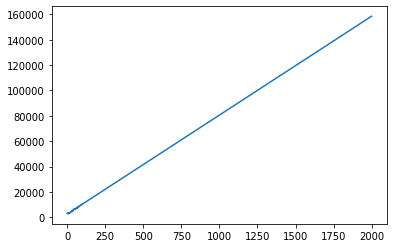

In [164]:
import matplotlib.pyplot as plt
plt.plot(total_pattern)

In [166]:
%time
total_pattern[len(total_pattern)-1]-total_pattern[len(total_pattern)-2]
linear_term = np.polyfit(range(len(total_pattern)), total_pattern, 1)[0]//1
print(linear_term)
lin_generation = 0
for i in range(len(total_pattern)-1):
    if(total_pattern[i+1]-total_pattern[i] == 78):
        lin_generation = i
        break
print_result(int(total_pattern[i]+linear_term*(50000000000-99)))



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
78.0
'RESULT: 3900000002467'

'TIME............................................................'


# LEVEL 13

## setup

In [8]:
H_T = '-'
V_T = '|'
X = '+'
C_R = '/'
C_L = '\\'

X = 1
Y = 0

CART_TYPES = ['>', '^', '<','v']
TURN_ORDER = ['left','straight','right']

@dataclass
class Cart:
    loc: list 
    dire: chr 
    turn: int = 0
   
tracks = get_level_input(13).splitlines()
# print(tracks)
# tracks = ["/->-\\        ","|   |  /----\\","| /-+--+-\\  |","| | |  | v  |","\\-+-/  \\-+--/","  \\------/   "]
# tracks = ["/>-<\\  ","|   |  ","| /<+-\\","| | | v","\\>+</ |","  |   ^","  \\<->/"]

main_track_grid = np.array([list(row) for row in tracks])
main_carts = []

def add_carts(cart_locs, cart_type):
    for cart_loc in cart_locs:
        main_carts.append(Cart(list(cart_loc), cart_type))
        main_track_grid[tuple(cart_loc)] = H_T if cart_type in ['<', '>'] else V_T

for cart_type in CART_TYPES:
    cart_locs = np.where(main_track_grid == cart_type)
    if(len(cart_locs[0])):
        cart_locs = list(zip(cart_locs[0], cart_locs[1]))
        add_carts(cart_locs, cart_type)

## part one

In [9]:
%%time
carts = deepcopy(main_carts)
track_grid = deepcopy(main_track_grid)
def print_track():
    print_track_grid = deepcopy(track_grid)
    for cart in carts:
        print_track_grid[tuple(cart.loc)] = cart.dire
    for line in print_track_grid:
        print("".join(line))
        

def check_for_crash(): 
    cart_locs = [tuple(cart.loc) for cart in carts]
    location_counter = collections.Counter(cart_locs)
    for key in location_counter:
        if(location_counter[key]>=2):
            print_result(f"{key[X]},{key[Y]}")
            raise StopExecution
         
def up_down(cart):
    if(cart.dire == '^'): cart.loc[Y] -= 1
    if(cart.dire == 'v'): cart.loc[Y] += 1
        
def left_right(cart):
    if(cart.dire == '>'): cart.loc[X] += 1
    if(cart.dire == '<'): cart.loc[X] -= 1
        
def curve_right(cart):
    if(cart.dire == '>'):
        cart.dire = '^'
        cart.loc[Y] -= 1
    elif(cart.dire == '^'):
        cart.dire = '>'
        cart.loc[X] += 1
    elif(cart.dire == '<'):
        cart.dire = 'v'
        cart.loc[Y] += 1
    elif(cart.dire == 'v'):
        cart.dire = '<'
        cart.loc[X] -= 1

def curve_left(cart):
    if(cart.dire == '>'):
        cart.dire = 'v'
        cart.loc[Y] += 1
    elif(cart.dire == '^'):
        cart.dire = '<'
        cart.loc[X] -= 1
    elif(cart.dire == '<'):
        cart.dire = '^'
        cart.loc[Y] -= 1
    elif(cart.dire == 'v'):
        cart.dire = '>'
        cart.loc[X] += 1

def intersection(cart):
    direction = (TURN_ORDER[cart.turn%3])
    if direction == "left":
        cart.dire = CART_TYPES[(CART_TYPES.index(cart.dire)+1)%4]
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    elif direction == "straight":
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    elif direction == "right":
        cart.dire = CART_TYPES[(CART_TYPES.index(cart.dire)-1)]
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    cart.turn+=1

def move_carts(cart):
    direction = cart.dire
    current_track = track_grid[tuple(cart.loc)]
    result = {
      '|': up_down,
      '-': left_right,
      '/': curve_right,
      '\\': curve_left,
      '+': intersection 
    }[current_track](cart)

while True:
    carts.sort(key = lambda x: x.loc)
    for cart in carts:
        move_carts(cart)
        check_for_crash()
    

'RESULT: 117,62'

'TIME............................................................'


## part two

In [10]:
%%time

carts = deepcopy(main_carts)
track_grid = deepcopy(main_track_grid)

def print_track():
    print_track_grid = track_grid.copy()
    for cart in carts:
        print_track_grid[tuple(cart.loc)] = cart.dire
    for line in print_track_grid:
        print("".join(line))
        

def remove_crashes(cart_index): 
    before_cart = False
    removed = False
    cart_locs = [tuple(cart.loc) for cart in carts]
    location_counter = collections.Counter(cart_locs)
    for key in location_counter:
        if(location_counter[key]>=2):
            removed = True
            carts.remove(carts[cart_index])
            i = 0
            while i != len(carts):
                if(carts[i].loc == list(key)):
                    carts.remove(carts[i])
                    if(i < cart_index):
                         before_cart = True
                else:
                    i+=1
    return before_cart, removed
         
def up_down(cart):
    if(cart.dire == '^'): cart.loc[Y] -= 1
    if(cart.dire == 'v'): cart.loc[Y] += 1
        
def left_right(cart):
    if(cart.dire == '>'): cart.loc[X] += 1
    if(cart.dire == '<'): cart.loc[X] -= 1
        
def curve_right(cart):
    if(cart.dire == '>'):
        cart.dire = '^'
        cart.loc[Y] -= 1
    elif(cart.dire == '^'):
        cart.dire = '>'
        cart.loc[X] += 1
    elif(cart.dire == '<'):
        cart.dire = 'v'
        cart.loc[Y] += 1
    elif(cart.dire == 'v'):
        cart.dire = '<'
        cart.loc[X] -= 1

def curve_left(cart):
    if(cart.dire == '>'):
        cart.dire = 'v'
        cart.loc[Y] += 1
    elif(cart.dire == '^'):
        cart.dire = '<'
        cart.loc[X] -= 1
    elif(cart.dire == '<'):
        cart.dire = '^'
        cart.loc[Y] -= 1
    elif(cart.dire == 'v'):
        cart.dire = '>'
        cart.loc[X] += 1

def intersection(cart):
    direction = (TURN_ORDER[cart.turn%3])
    if direction == "left":
        cart.dire = CART_TYPES[(CART_TYPES.index(cart.dire)+1)%4]
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    elif direction == "straight":
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    elif direction == "right":
        cart.dire = CART_TYPES[(CART_TYPES.index(cart.dire)-1)]
        if cart.dire in ['^', 'v']: up_down(cart)
        else: left_right(cart)
    cart.turn+=1

def move_carts(cart):
    direction = cart.dire
    current_track = track_grid[tuple(cart.loc)]
    result = {
      '|': up_down,
      '-': left_right,
      '/': curve_right,
      '\\': curve_left,
      '+': intersection 
    }[current_track](cart)

while len(carts)>1: 
    carts.sort(key = lambda x: x.loc)
    i = 0
    while(i < len(carts)):
        move_carts(carts[i])
        removed, before_cart = remove_crashes(i)
        if(before_cart):
            i-=1
        if(not removed):
            i+=1
            
print_result(f"{carts[0].loc[X]},{carts[0].loc[Y]}")

'RESULT: 69,67'

'TIME............................................................'
CPU times: user 629 ms, sys: 4.78 ms, total: 634 ms
Wall time: 636 ms


# LEVEL 14

## setup

In [28]:
trial_recipe_count = int(get_level_input(14))
# trial_recipe_count = 59414
test_size = 10

elf_one = [3, 0]
elf_two = [7, 1]

recipe_list = [3,7]
match_list = (list(str(trial_recipe_count)))
len_match = len(match_list)
print(("".join(match_list)))

681901


## part one

In [29]:
%%time

while(len(recipe_list) != trial_recipe_count + test_size):
    recipe_sum = elf_one[0]+elf_two[0]
    recipe_string = str(recipe_sum)
    for val in list(recipe_string):
        recipe_list.append(int(val))
    elf_one[1]= (elf_one[1]+elf_one[0]+1)%len(recipe_list)
    elf_one[0] = recipe_list[elf_one[1]]
    
    elf_two[1]= (elf_two[1]+elf_two[0]+1)%len(recipe_list)
    elf_two[0] = recipe_list[elf_two[1]]
recipe_string = "".join([str(x) for x in recipe_list[-10:]])
print_result(recipe_string)

'RESULT: 1617111014'

'TIME............................................................'
CPU times: user 1.18 s, sys: 11 ms, total: 1.2 s
Wall time: 1.2 s


## part two

In [18]:
%%time

while(True):
    recipe_sum = elf_one[0]+elf_two[0]
    recipe_string = str(recipe_sum)
    for val in list(recipe_string):
        recipe_list.append(int(val))
        if("".join([str(x) for x in recipe_list[-len_match:]]) == "".join(match_list)):
            print_result(len(recipe_list)-len_match)
            raise StopExecution
    elf_one[1]= (elf_one[1]+elf_one[0]+1)%len(recipe_list)
    elf_one[0] = recipe_list[elf_one[1]]
    
    elf_two[1]= (elf_two[1]+elf_two[0]+1)%len(recipe_list)
    elf_two[0] = recipe_list[elf_two[1]]
print_result(len(recipe_list)-len_match)


'RESULT: 20321495'

'TIME............................................................'


# LEVEL 15

## setup

In [44]:
@dataclass
class Unit:
    loc: list
    u_type: chr
    health: int = 200
    attack: int = 3
 


game_map = get_level_input(15).splitlines()

main_game_map = np.array([list(row) for row in game_map])
UNIT_TYPES = ['E', 'G']
WALL = '#'
elves = []
goblins = []
all_units =[]
walls = set()

def add_units(unit_locs, unit_type):
    for unit_loc in unit_locs:
        unit = Unit(loc=unit_loc, u_type=unit_type)
        if(unit_type == 'E'):
            elves.append(unit)
        else:
            goblins.append(unit)
        all_units.append(unit)
        main_game_map[tuple(unit_loc)] = '.'

for unit_type in UNIT_TYPES:
    unit_locs = np.where(main_game_map == unit_type)
    if(len(unit_locs[0])):
        unit_locs = list(zip(unit_locs[0], unit_locs[1]))
        add_units(unit_locs, unit_type)

walls = np.where(main_game_map == WALL)
if(len(walls[0])):
    walls = set(zip(walls[0], walls[1]))
    
def print_track():
    print_game_map = deepcopy(main_game_map)
    for unit in all_units:
        print_game_map[tuple(unit.loc)] = unit.u_type
    for line in print_game_map:
        print("".join(line))
print_track()

################################
#########.####...#####.#########
#####...#G...#.G.##.#...##.##..#
####...G####.G....#..........E.#
#####..#######.................#
#####..###########.............#
#GG...############.............#
#...#.#.##..######..........#..#
##............#G.#..E.......####
##.G........#....#.........#####
###....G...................#####
###............G.....G.......###
#####.....#..G#####..........###
####..#......#######G...#.E..E##
####G##.G...#########.#.......##
###..###....#########...E....###
##...G......#########.E...######
##G.........#########......#####
##...#.G....#########.#...######
##...#.......#######E.##########
####.#........#####...##########
#######............E..##########
####..#...........E#############
##...G#...........##############
##........#.......##############
#####G..###..E..################
##########......################
##########.....#################
#########......#################
###########.....################
##########

## part one

In [145]:
%%time

while(len(recipe_list) != trial_recipe_count + test_size):
    recipe_sum = elf_one[0]+elf_two[0]
    recipe_string = str(recipe_sum)
    for val in list(recipe_string):
        recipe_list.append(int(val))
    elf_one[1]= (elf_one[1]+elf_one[0]+1)%len(recipe_list)
    elf_one[0] = recipe_list[elf_one[1]]
    
    elf_two[1]= (elf_two[1]+elf_two[0]+1)%len(recipe_list)
    elf_two[0] = recipe_list[elf_two[1]]
recipe_string = "".join([str(x) for x in recipe_list[-10:]])
print_result(recipe_string)

'RESULT: 1617111014'

'TIME............................................................'
CPU times: user 1.17 s, sys: 9.87 ms, total: 1.18 s
Wall time: 1.19 s


## part two

In [18]:
%%time

while(True):
    recipe_sum = elf_one[0]+elf_two[0]
    recipe_string = str(recipe_sum)
    for val in list(recipe_string):
        recipe_list.append(int(val))
        if("".join([str(x) for x in recipe_list[-len_match:]]) == "".join(match_list)):
            print_result(len(recipe_list)-len_match)
            raise StopExecution
    elf_one[1]= (elf_one[1]+elf_one[0]+1)%len(recipe_list)
    elf_one[0] = recipe_list[elf_one[1]]
    
    elf_two[1]= (elf_two[1]+elf_two[0]+1)%len(recipe_list)
    elf_two[0] = recipe_list[elf_two[1]]
print_result(len(recipe_list)-len_match)


'RESULT: 20321495'

'TIME............................................................'
